In [ ]:
# 讀入影像
# 轉灰階
# 使用threshold_otsu轉對比
# skimage.measure的find_contours

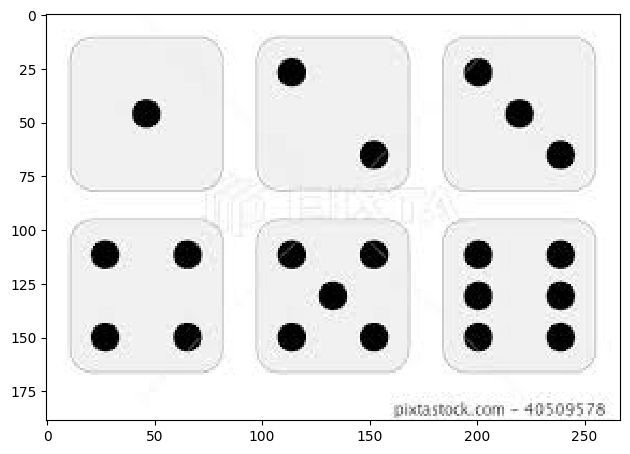

In [1]:
%matplotlib inline
from skimage import io

wheels = io.imread('sample.jpg', as_gray = True)
io.imshow(wheels)

0.505859375


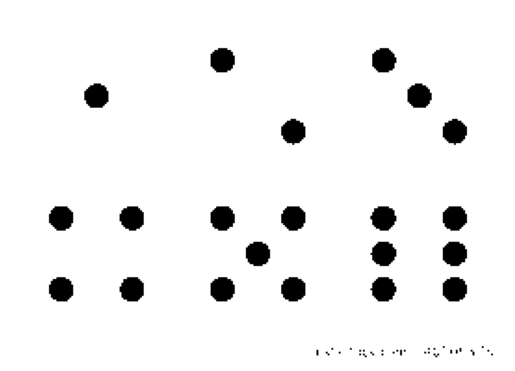

In [2]:
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
thres = threshold_otsu(wheels)
print(thres)
wheels_thres = wheels > thres
plt.imshow(wheels_thres, cmap = 'gray')
plt.axis('off')
plt.show()

In [3]:
from skimage.measure import find_contours
contours = find_contours(wheels_thres, level = 0.1)
print(len(contours))

50


In [4]:
for c in contours:
    print(c.shape)

(53, 2)
(53, 2)
(53, 2)
(53, 2)
(55, 2)
(55, 2)
(53, 2)
(53, 2)
(53, 2)
(53, 2)
(55, 2)
(53, 2)
(53, 2)
(55, 2)
(53, 2)
(53, 2)
(53, 2)
(53, 2)
(53, 2)
(55, 2)
(53, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(9, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(7, 2)
(7, 2)
(11, 2)
(5, 2)
(9, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(13, 2)
(5, 2)


In [5]:
sorted([c.shape[0] for c in contours], reverse = True)
import numpy as np
np.sum(np.array([c.shape[0] for c in contours]) > 50)

21

In [6]:
contours[-1].shape

(5, 2)

In [7]:
contours[1][:, 1], contours[1][:, 0],

(array([203.1, 204. , 205. , 205.1, 206. , 206.1, 206.1, 206.1, 207. ,
        207.1, 207.1, 207.1, 207. , 206.1, 206.1, 206. , 205.1, 205. ,
        204.1, 204. , 203.1, 203. , 202. , 201. , 200. , 199. , 198.9,
        198. , 197. , 196.9, 196. , 195.9, 195. , 194.9, 194.9, 194.9,
        194.9, 194.9, 194.9, 194.9, 195. , 195.9, 196. , 196.9, 197. ,
        197.9, 198. , 199. , 200. , 201. , 202. , 203. , 203.1]),
 array([33. , 32.1, 32.1, 32. , 31.1, 31. , 30. , 29. , 28.1, 28. , 27. ,
        26. , 25.9, 25. , 24. , 23.9, 23. , 22.9, 22. , 21.9, 21. , 20.9,
        20.9, 20.9, 20.9, 20.9, 21. , 21.9, 21.9, 22. , 22.9, 23. , 23.9,
        24. , 25. , 26. , 27. , 28. , 29. , 30. , 30.1, 31. , 31.1, 32. ,
        32.1, 33. , 33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33. ]))

(53, 2)


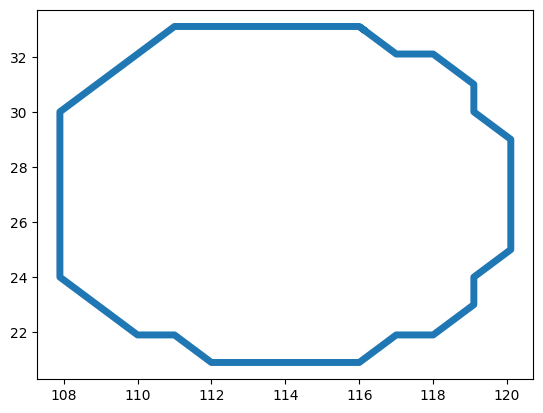

In [8]:
# 每一個圖框都可以繪製出邊界
print(contours[0].shape)
plt.plot(contours[0][:, 1], contours[0][:, 0], linewidth = 5)
plt.show()

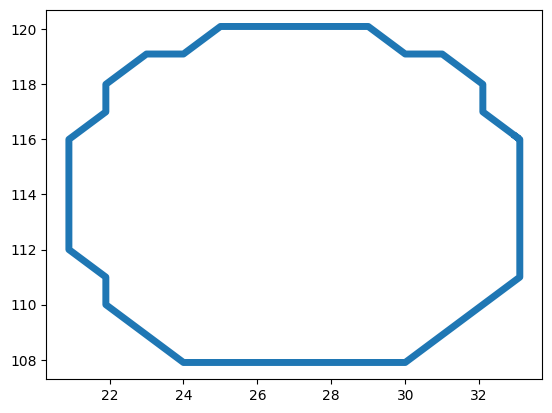

In [9]:
# 每一個圖框都可以繪製出邊界(以下不對)
plt.plot(contours[0][:, 0], contours[0][:, 1], linewidth = 5)
plt.show()

In [10]:
def show_image_contour(image, contours, lower, upper):
    plt.figure()
    for n, contour in enumerate(contours):
        if upper > contour.shape[0] > lower:
            # print(n)
            plt.plot(contour[:, 1], contour[:, 0], linewidth = 2, color = 'red')
    plt.imshow(image, interpolation = 'nearest', cmap = 'gray')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

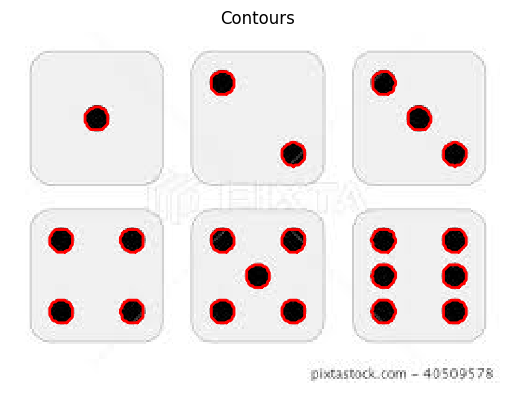

In [11]:
import matplotlib.pyplot as plt
show_image_contour(wheels, contours, 50, 60) # 圖框的大小範圍

In [13]:
# Practice

%matplotlib inline
import matplotlib.pyplot as plt

def show_image(image, title = 'Image', cmap_type = 'gray', interpolation = None):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def plot_comparision(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (32, 8), sharex = True, sharey = True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap = plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth = 1, color = 'red', marker = '^')
    plt.imshow(image, interpolation = 'nearest', cmap = 'gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

# Import the data and the module needed for contouring detection.
# Obtain the horse image shown in the context area.
# Find the contours of the horse image using a constant level value of 0.8.

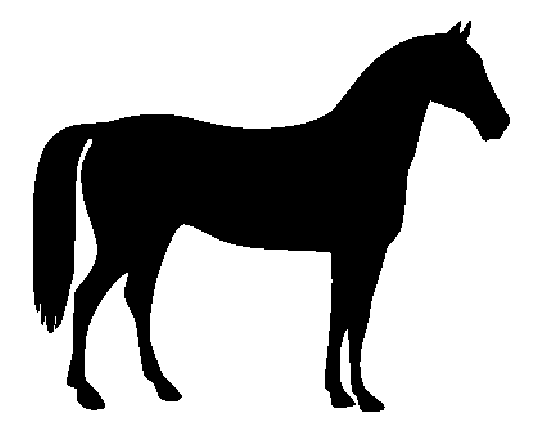

In [14]:
%matplotlib inline
from skimage import data, io
io.imshow(data.horse().astype('float32'))
plt.axis('off')
plt.show()

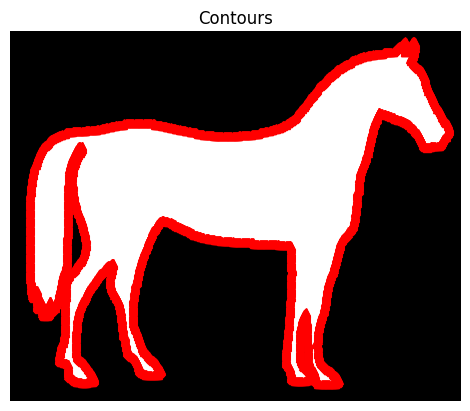

In [15]:
# Import the modules
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

(120, 120, 4)


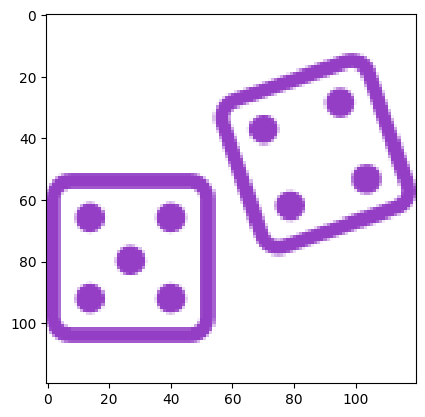

In [17]:
# Practice

from skimage import color, measure
from skimage.filters import threshold_otsu

import ast
import numpy as np
import matplotlib.pyplot as plt

with open('image_dices.txt') as f:
    image_dices = np.array(ast.literal_eval(f.read()), dtype = 'uint8')[:, :, :]
    # [:, :, :3] # 第一種方式：去除RGBA的A部分

print(image_dices.shape)
plt.imshow(image_dices)
plt.show()

# Transform the image to grayscale using rgb2gray().
# Obtain the optimal threshold value for the image and set it as thresh.
# Apply thresholding to the image once you have the optimal threshold value thresh, using the corresponding operator.
# Apply the corresponding function to obtain the contours and use a value level of 0.8.

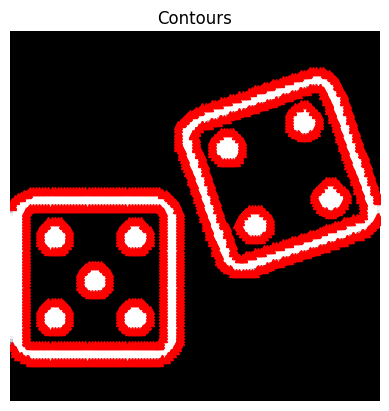

In [18]:
# Make the image grayscale
# 第二種方式：color.rgba2rgb
image_dices = color.rgb2gray(color.rgba2rgb(image_dices))

# rgb2gray(rgba2rgb(rgb))
# Obtain the optimal thresh value
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary = image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image_contour(image_dices, contours)

In [19]:
# Practice

import ast
import numpy as np
import matplotlib.pyplot as plt

with open('contours.txt') as f:
    contours = ast.literal_eval(f.read())

contours = [np.array(i) for i in contours]
print(len(contours))
contours

# Make shape_contours be a list with all contour shapes of contours.
# Set max_dots_shape to 50.
# Set the shape condition of the contours to be the maximum shape size of the dots max_dots_shape.
# Print the dice's number.

13


[array([[ 61.2, 119. ],
        [ 62. , 118.2],
        [ 62.2, 118. ],
        [ 63. , 117.2],
        [ 63.2, 117. ],
        [ 64. , 116.2],
        [ 64.2, 116. ],
        [ 65. , 115.2],
        [ 65.2, 115. ],
        [ 65.2, 114. ],
        [ 65.2, 113. ],
        [ 66. , 112.2],
        [ 66.2, 112. ],
        [ 66.2, 111. ],
        [ 66.2, 110. ],
        [ 67. , 109.2],
        [ 67.2, 109. ],
        [ 67.2, 108. ],
        [ 67.2, 107. ],
        [ 68. , 106.2],
        [ 68.2, 106. ],
        [ 68.2, 105. ],
        [ 68.2, 104. ],
        [ 69. , 103.2],
        [ 69.2, 103. ],
        [ 69.2, 102. ],
        [ 70. , 101.2],
        [ 70.2, 101. ],
        [ 70.2, 100. ],
        [ 70.2,  99. ],
        [ 71. ,  98.2],
        [ 71.2,  98. ],
        [ 71.2,  97. ],
        [ 71.2,  96. ],
        [ 72. ,  95.2],
        [ 72.2,  95. ],
        [ 72.2,  94. ],
        [ 72.2,  93. ],
        [ 73. ,  92.2],
        [ 73.2,  92. ],
        [ 73.2,  91. ],
        [ 73.2, 

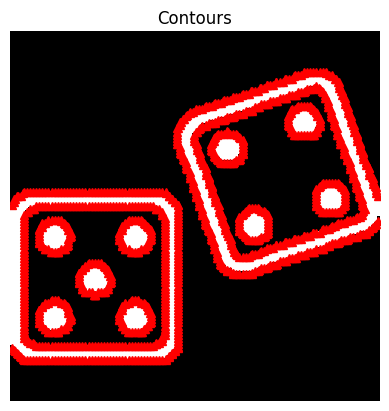

Dice's dots number: 9. 


In [20]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

### Finding Contours of Peoples

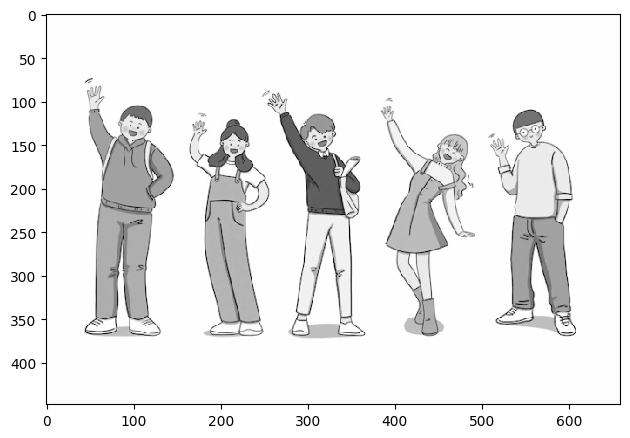

In [21]:
%matplotlib inline
from skimage import io
wheels = io.imread('peoples.jpg', as_gray = True)
io.imshow(wheels)

0.783203125


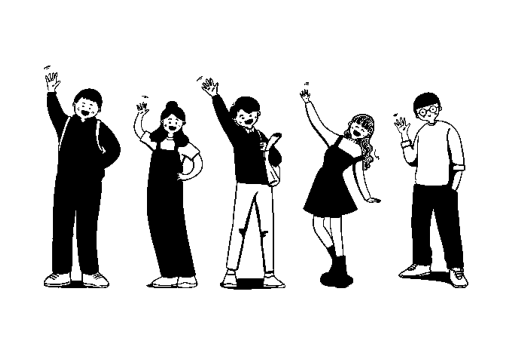

In [23]:
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
thres = threshold_otsu(wheels)
print(thres)
wheels_thres = wheels > thres
plt.imshow(wheels_thres, cmap = 'gray')
plt.axis('off')
plt.show()

In [24]:
from skimage.measure import find_contours
contours = find_contours(wheels_thres, level = 0.1)
print(len(contours))

273


In [25]:
for c in contours:
    print(c.shape)

(41, 2)
(1123, 2)
(17, 2)
(9, 2)
(5, 2)
(37, 2)
(7, 2)
(1005, 2)
(5, 2)
(5, 2)
(17, 2)
(115, 2)
(5, 2)
(29, 2)
(5, 2)
(9, 2)
(7, 2)
(13, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(21, 2)
(1157, 2)
(1511, 2)
(47, 2)
(5, 2)
(5, 2)
(29, 2)
(147, 2)
(7, 2)
(1069, 2)
(13, 2)
(205, 2)
(5, 2)
(93, 2)
(13, 2)
(7, 2)
(11, 2)
(33, 2)
(5, 2)
(7, 2)
(5, 2)
(9, 2)
(27, 2)
(11, 2)
(13, 2)
(9, 2)
(141, 2)
(31, 2)
(41, 2)
(5, 2)
(5, 2)
(5, 2)
(95, 2)
(17, 2)
(15, 2)
(11, 2)
(5, 2)
(23, 2)
(139, 2)
(5, 2)
(19, 2)
(13, 2)
(15, 2)
(33, 2)
(9, 2)
(5, 2)
(121, 2)
(15, 2)
(9, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(17, 2)
(5, 2)
(41, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(25, 2)
(5, 2)
(7, 2)
(5, 2)
(7, 2)
(7, 2)
(5, 2)
(5, 2)
(103, 2)
(7, 2)
(9, 2)
(5, 2)
(7, 2)
(5, 2)
(5, 2)
(5, 2)
(31, 2)
(5, 2)
(123, 2)
(13, 2)
(13, 2)
(119, 2)
(13, 2)
(7, 2)
(5, 2)
(7, 2)
(5, 2)
(5, 2)
(11, 2)
(7, 2)
(5, 2)
(11, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(7, 2)
(9, 2)
(5, 2)
(13, 2)
(5, 2)
(11, 2)
(9, 2)
(5, 2)
(5, 2)
(7, 2)
(33, 2)
(17, 2)
(

In [26]:
sorted([c.shape[0] for c in contours], reverse = True)[:10]

[1511, 1157, 1123, 1069, 1005, 605, 285, 229, 227, 217]

In [27]:
def show_image_contour(image, contours, lower, upper):
    plt.figure()
    for n, contour in enumerate(contours):
        if upper > contour.shape[0] > lower:
            # print(n)
            plt.plot(contour[:, 1], contour[:, 0], linewidth = 2, color = 'red')
    plt.imshow(image, interpolation = 'nearest', cmap = 'gray')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

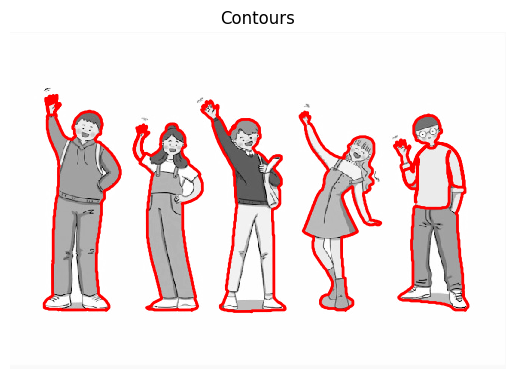

In [28]:
import matplotlib.pyplot as plt
show_image_contour(wheels, contours, 1000, 2000) # 圖框的大小範圍

### Finding Contours of Hourse

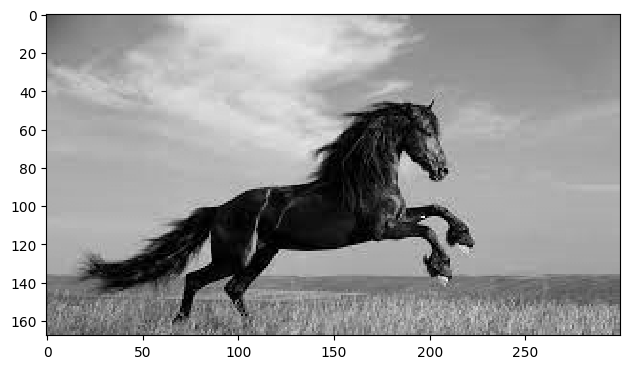

In [29]:
%matplotlib inline
from skimage import io
wheels = io.imread('hourse1.jpg', as_gray = True)
io.imshow(wheels)

0.3845476853553922


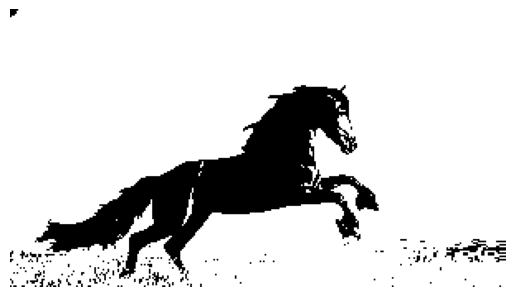

In [30]:
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
thres = threshold_otsu(wheels)
print(thres)
wheels_thres = wheels > thres
plt.imshow(wheels_thres, cmap = 'gray')
plt.axis('off')
plt.show()

In [31]:
from skimage.measure import find_contours
contours = find_contours(wheels_thres, level = 0.1)
print(len(contours))

195


In [32]:
for c in contours:
    print(c.shape)

(10, 2)
(1303, 2)
(7, 2)
(5, 2)
(5, 2)
(15, 2)
(13, 2)
(7, 2)
(5, 2)
(15, 2)
(5, 2)
(27, 2)
(5, 2)
(5, 2)
(7, 2)
(15, 2)
(5, 2)
(5, 2)
(13, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(19, 2)
(5, 2)
(7, 2)
(5, 2)
(5, 2)
(11, 2)
(7, 2)
(5, 2)
(9, 2)
(11, 2)
(51, 2)
(5, 2)
(7, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(11, 2)
(152, 2)
(9, 2)
(9, 2)
(13, 2)
(5, 2)
(13, 2)
(5, 2)
(5, 2)
(9, 2)
(7, 2)
(7, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(25, 2)
(5, 2)
(7, 2)
(5, 2)
(7, 2)
(15, 2)
(9, 2)
(31, 2)
(11, 2)
(13, 2)
(17, 2)
(7, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(15, 2)
(13, 2)
(15, 2)
(21, 2)
(5, 2)
(7, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(15, 2)
(9, 2)
(6, 2)
(13, 2)
(5, 2)
(17, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(5, 2)
(11, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(27, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(31, 2)
(7, 2)
(7, 2)
(9, 2)
(5, 2)
(39, 2)
(7, 2

In [33]:
sorted([c.shape[0] for c in contours], reverse = True)[:10]

[1303, 152, 55, 51, 39, 31, 31, 27, 27, 25]

In [34]:
def show_image_contour(image, contours, lower, upper):
    plt.figure()
    for n, contour in enumerate(contours):
        if upper > contour.shape[0] > lower:
            # print(n)
            plt.plot(contour[:, 1], contour[:, 0], linewidth = 2, color = 'red')
    plt.imshow(image, interpolation = 'nearest', cmap = 'gray')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

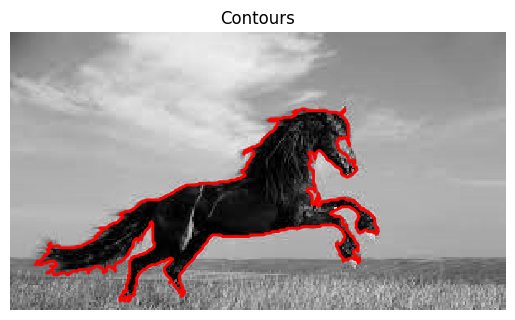

In [35]:
import matplotlib.pyplot as plt
show_image_contour(wheels, contours, 1000, 2000)